### 1- Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split

### 2- Chargement des données d'un fichier CSV avec Pandas:

In [2]:
train=pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\data\AWID.csv')

### 3- Résumé sur l'ensemble de données

In [3]:
col_names =['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

train = pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\data\AWID.csv',header=None, names = col_names)

In [4]:
train.head(10)

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal
5,0,?,0.0,1.393661e+09,0.000005,0.000005,0.081647,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
6,0,?,0.0,1.393661e+09,0.016692,0.016692,0.098339,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
7,0,?,0.0,1.393661e+09,0.000142,0.000142,0.098481,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
8,0,?,0.0,1.393661e+09,0.028067,0.028067,0.126548,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
9,0,?,0.0,1.393661e+09,0.001801,0.001801,0.128349,185,185,0,...,?,?,?,?,?,?,?,?,?,normal


In [5]:
train.shape

(1795575, 155)

class
normal                    1633190
arp                         64609
cafe_latte                  45889
amok                        31180
deauthentication            10447
authentication_request       3500
evil_twin                    2633
beacon                       1799
probe_response               1558
fragmentation                 770
Name: count, dtype: int64

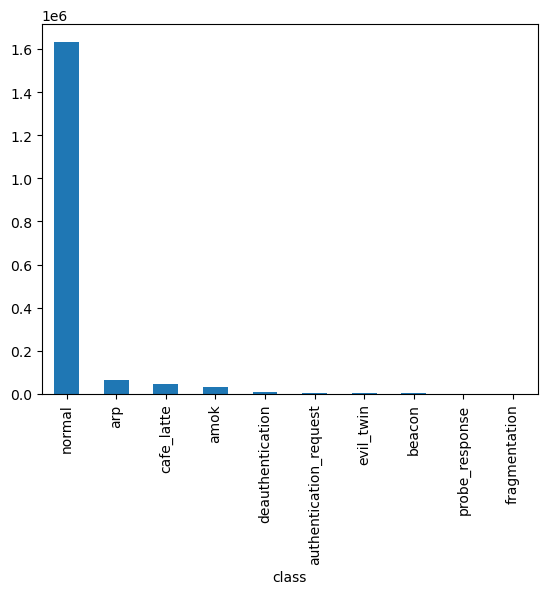

In [6]:
train["class"].value_counts().plot.bar()
train['class'].value_counts()

In [7]:
# Remplacer les "?" par NaN
train.replace('?', pd.NA, inplace=True)

# Supprimer les colonnes contenant NaN
train.dropna(axis=1, inplace=True)


In [8]:
colonnes_contenant_0x00000000 = [colonne for colonne in train.columns if '0x00000000' in train[colonne].astype(str).values]
colonnes_contenant_0x00000000

['radiotap.present.reserved']

In [9]:
colonnes_contenant_0x08 = [colonne for colonne in train.columns if '0x08' in train[colonne].astype(str).values]
colonnes_contenant_0x08

['wlan.fc.type_subtype']

In [10]:
train = train.drop(columns=['radiotap.present.reserved'])
train = train.drop(columns=['wlan.fc.type_subtype'])
train = train.drop(columns=['wlan.fc.ds'])

In [11]:
train.shape

(1795575, 46)

In [12]:
train.head(10)

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,class
0,0,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,0,...,0,0,8,0,0,0,0,0,0,normal
1,0,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,0,...,0,0,8,0,0,0,0,0,0,normal
2,0,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,0,...,0,0,8,0,0,0,0,0,0,normal
3,0,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,0,...,0,0,8,0,0,0,0,0,0,normal
4,0,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,0,...,0,2,4,0,0,0,0,0,0,normal
5,0,0.0,1.393661e+09,0.000005,0.000005,0.081647,40,40,0,0,...,0,1,13,0,0,0,0,0,0,normal
6,0,0.0,1.393661e+09,0.016692,0.016692,0.098339,261,261,0,0,...,0,0,8,0,0,0,0,0,0,normal
7,0,0.0,1.393661e+09,0.000142,0.000142,0.098481,40,40,0,0,...,0,1,13,0,0,0,0,0,0,normal
8,0,0.0,1.393661e+09,0.028067,0.028067,0.126548,185,185,0,0,...,0,0,8,0,0,0,0,0,0,normal
9,0,0.0,1.393661e+09,0.001801,0.001801,0.128349,185,185,0,0,...,0,0,8,0,0,0,0,0,0,normal


In [13]:
# Créez une nouvelle colonne 'binary_labels' avec 0 pour 'normal' et 1 pour toutes les autres classes
train['binary_labels'] = train['class'].apply(lambda x: 0 if x == 'normal' else 1)

binary_labels
0    1633190
1     162385
Name: count, dtype: int64

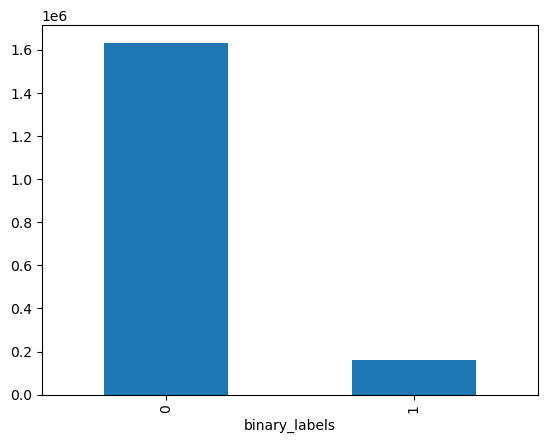

In [14]:
train["binary_labels"].value_counts().plot.bar()
train['binary_labels'].value_counts()

([<matplotlib.patches.Wedge at 0x1ba09e4f4d0>,
 [Text(-0.3083375406706332, -1.0559014920972438, 'Normal'),
  Text(0.30833756538579116, 1.0559014848800825, 'attaque')],
 [Text(-0.16818411309307263, -0.5759462684166784, '91.0%'),
  Text(0.16818412657406787, 0.5759462644800449, '9.0%')])

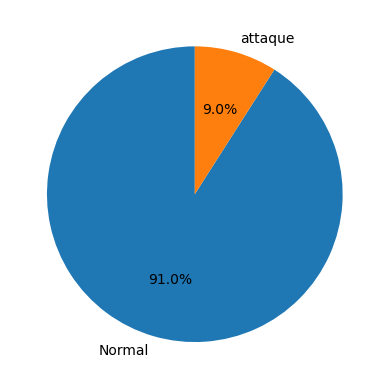

In [15]:
# Définissez les étiquettes pour les valeurs 0 et 1
binary_labels = ['Normal', 'attaque']
value_counts = train["binary_labels"].value_counts(normalize=True)
# Créez le diagramme circulaire avec les étiquettes
plt.pie(value_counts, labels=binary_labels, autopct='%1.1f%%', startangle=90)

In [16]:
train = train.drop(columns=['class'])

# Prétraitements convenables des données .

## 1.standarisation

In [17]:
#train
Scaler=StandardScaler().fit(train)
Scaler.transform(train)

array([[ 0.        ,  0.        , -2.15609631, ..., -0.98667414,
         0.        , -0.31532224],
       [ 0.        ,  0.        , -2.15606833, ..., -0.98667414,
         0.        , -0.31532224],
       [ 0.        ,  0.        , -2.15606645, ..., -0.98667414,
         0.        , -0.31532224],
       ...,
       [ 0.        ,  0.        ,  1.9934923 , ..., -0.98667414,
         0.        , -0.31532224],
       [ 0.        ,  0.        ,  1.99349231, ..., -0.98667414,
         0.        , -0.31532224],
       [ 0.        ,  0.        ,  1.99353066, ..., -0.98667414,
         0.        , -0.31532224]])

## 2.normalisation

In [18]:
#train
Scaler=Normalizer().fit(train)
Scaler.transform(train)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## 3.mise a l'échelle

In [19]:
#train
Scaler=MinMaxScaler(feature_range=(0,1))
Scaler.fit_transform(train)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.74277544e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.19586387e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.99990756e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99990758e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# separation jeu d'entrainement et de test

In [20]:
# Diviser les données en ensembles d'entraînement et de test
X = train.drop(columns=['binary_labels'])  # Caractéristiques
y = train['binary_labels']  # Variable cible
# Fractionnement des données en train et ensemble de test 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
# Imprimer les formes des nouveaux ensembles
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (1256902, 45)
Forme de X_test : (538673, 45)
Forme de y_train : (1256902,)
Forme de y_test : (538673,)


# MODELISATION

## 1. modèle Régression logistique

In [22]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, logistic_predictions)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Logistic Regression Accuracy: 0.91
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    490220
           1       0.00      0.00      0.00     48453

    accuracy                           0.91    538673
   macro avg       0.46      0.50      0.48    538673
weighted avg       0.83      0.91      0.87    538673


Recall  0.0
F1- Score   nan

Temps d'exécution Détection de primitives : 34.556063413619995 secondes


[[490220      0]
 [ 48453      0]]


<function matplotlib.pyplot.show(close=None, block=None)>

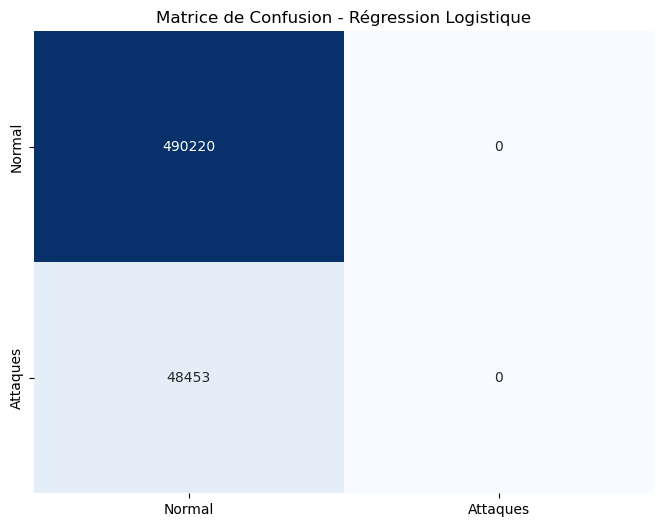

In [23]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Affichage de la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show

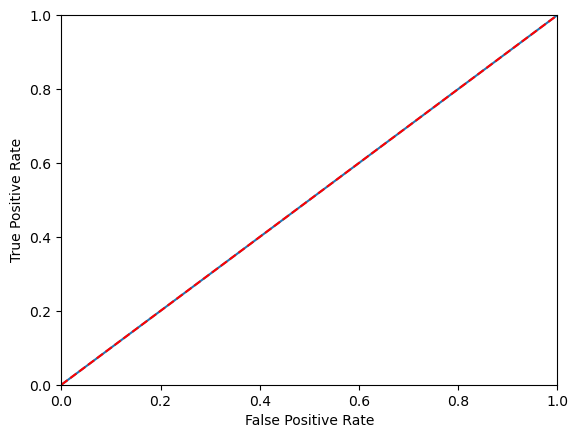

Area Under the Curve  0.5


In [24]:
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % logistic_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', logistic_auc)

## 2. modele Random forest

In [25]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9935935159178203
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    490220
           1       0.95      0.97      0.96     48453

    accuracy                           0.99    538673
   macro avg       0.98      0.99      0.98    538673
weighted avg       0.99      0.99      0.99    538673


Recall  0.9749654304171053
F1- Score   0.9647609030848249

Temps d'exécution Détection de primitives : 334.54775857925415 secondes


[[487982   2238]
 [  1213  47240]]


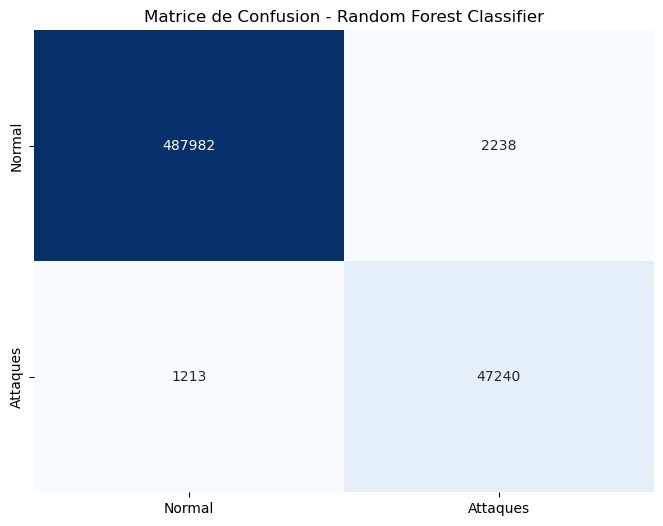

In [26]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Random Forest Classifier')
plt.show()

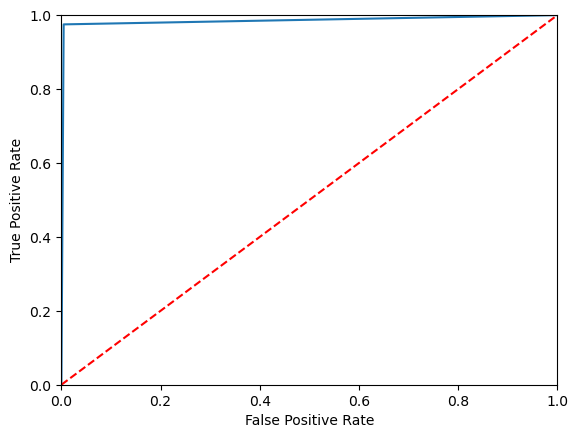

Area Under the Curve  0.9852000666018046


In [27]:
# Calculate AUC
RandomForest_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % RandomForest_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', RandomForest_auc)

## 3. modele Decision Tree

In [28]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the decision tree
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
# Predict on the test set
DecisionTree_pred = DecisionTree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
report = classification_report(y_test, DecisionTree_pred)
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9818814011468925
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    490220
           1       0.94      0.85      0.89     48453

    accuracy                           0.98    538673
   macro avg       0.96      0.92      0.94    538673
weighted avg       0.98      0.98      0.98    538673


Recall  0.8535900769818174
F1- Score   0.8944613854105842

Temps d'exécution Détection de primitives : 16.89367699623108 secondes


[[487554   2666]
 [  7094  41359]]


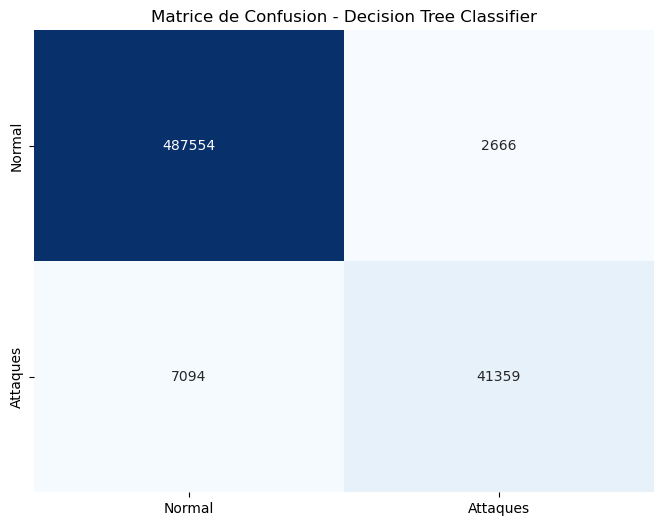

In [29]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Decision Tree Classifier')
plt.show()

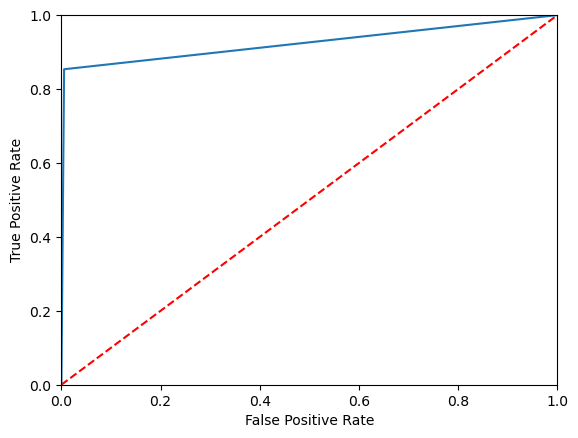

Area Under the Curve  0.9240758511872491


In [30]:
# Calculate AUC
DecisionTree_auc = roc_auc_score(y_test, DecisionTree_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, DecisionTree_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % DecisionTree_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', DecisionTree_auc)

# 4. Modele Support Vector Machines

In [21]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC
SVM = SVC(kernel = 'rbf',  C = 0.3, gamma = 0.02)
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9737577342840648
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    490220
           1       0.90      0.80      0.85     48453

    accuracy                           0.97    538673
   macro avg       0.94      0.90      0.92    538673
weighted avg       0.97      0.97      0.97    538673


Recall  0.8003013229315006
F1- Score   0.8458283346057367

Temps d'exécution Détection de primitives : 77576.9120311737 secondes


[[485760   4460]
 [  9676  38777]]


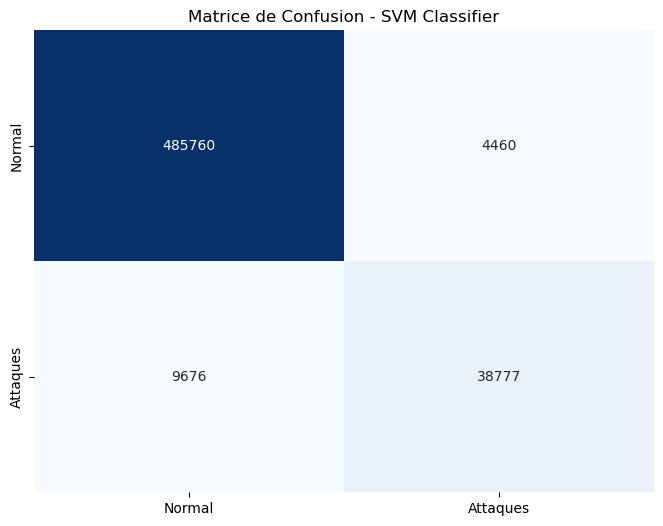

In [22]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

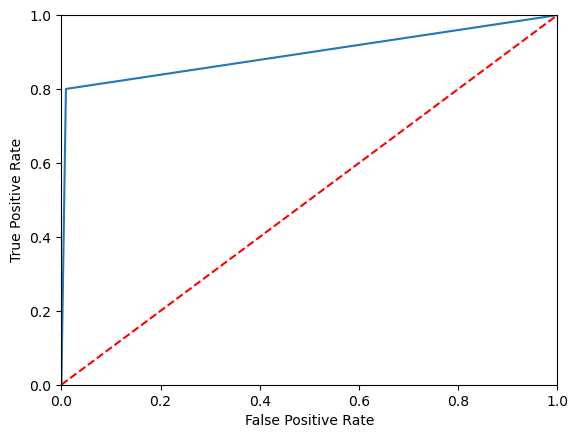

Area Under the Curve  0.8956016834558772


In [23]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

## 5. modele XGBCLASSIFIER

In [21]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9957321046349084
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    490220
           1       0.97      0.98      0.98     48453

    accuracy                           1.00    538673
   macro avg       0.98      0.99      0.99    538673
weighted avg       1.00      1.00      1.00    538673


Recall  0.9816316843126328
F1- Score   0.9764023607903516

Temps d'exécution Détection de primitives : 34.644362688064575 secondes


[[488811   1409]
 [   890  47563]]


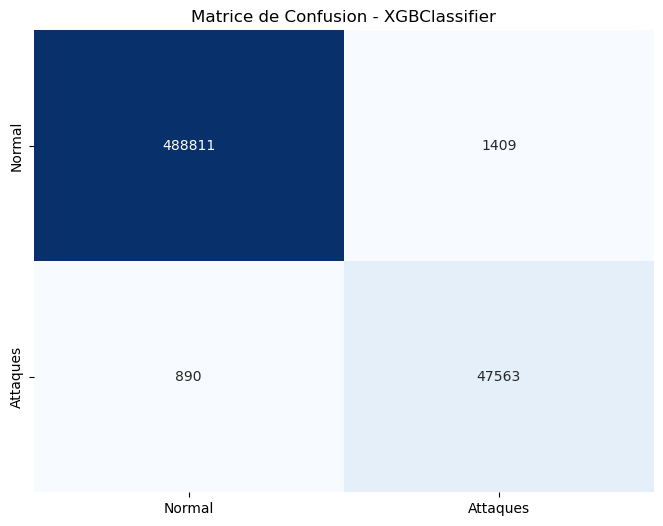

In [22]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - XGBClassifier')
plt.show()

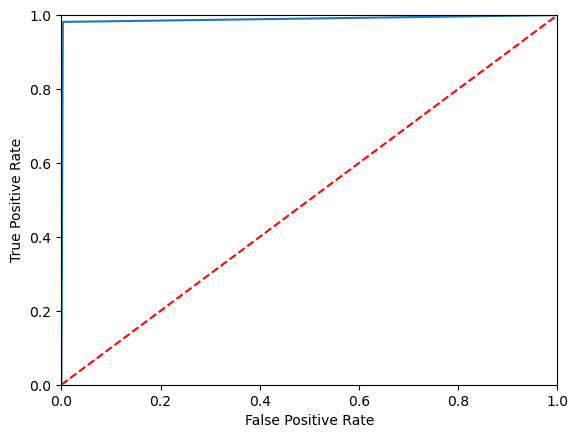

Area Under the Curve  0.989378732287278


In [23]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, xgb_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

# Exemple

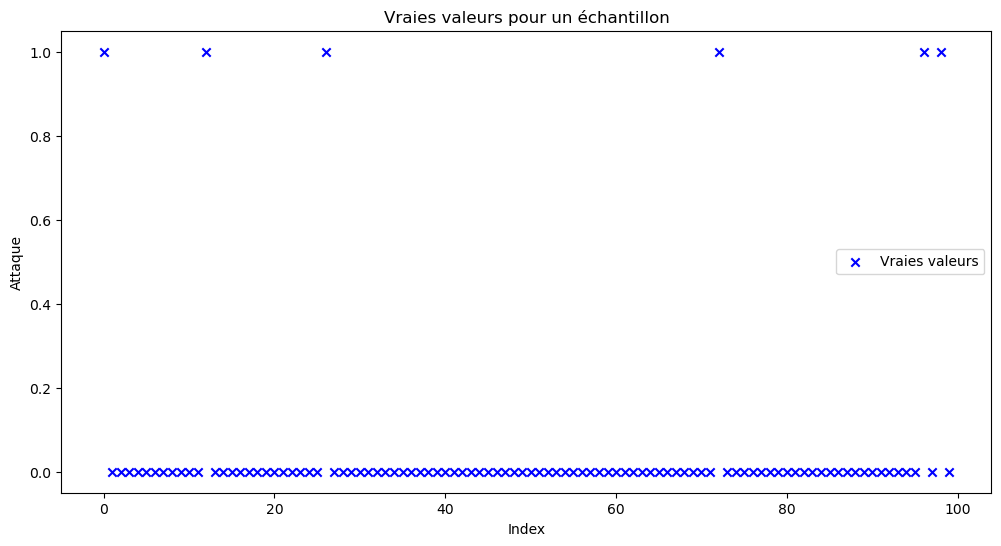

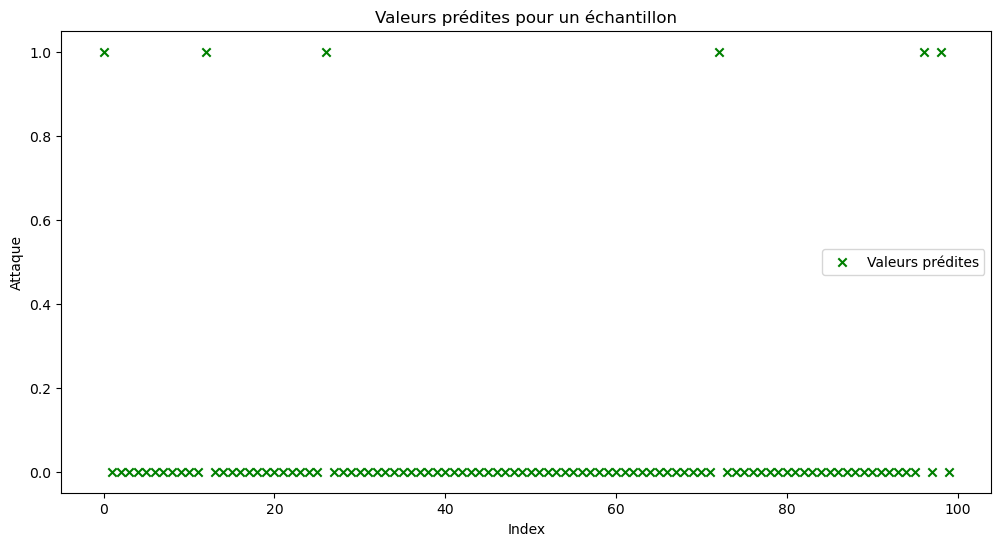

In [25]:
# Sélectionner un échantillon aléatoire de 1000 lignes
random_sample = train.sample(n=100, random_state=42)
# Séparer les caractéristiques (X) et la variable cible (y)
X_sample = random_sample.drop("binary_labels", axis=1)
y_sample = random_sample["binary_labels"]

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
y_pred_all = xgb_model.predict(X_test)

# Ajouter les colonnes des prédictions au DataFrame de l'ensemble de test
df_test_predictions = X_test.copy()
df_test_predictions['Real'] = y_test
df_test_predictions['Predictions_XGBClassifier'] = y_pred_all
# Sélectionner un échantillon aléatoire de 300 lignes dans l'ensemble de test
random_subset = df_test_predictions.sample(n=100, random_state=42)
# Plot pour les vraies valeurs
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Real'], label='Vraies valeurs', marker='x', color='blue')
plt.title('Vraies valeurs pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()
# Plot pour les valeurs prédites
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Predictions_XGBClassifier'], label='Valeurs prédites', marker='x', color='green')
plt.title('Valeurs prédites pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()

# Comparaison

comparaison valeur accuracy


<BarContainer object of 5 artists>

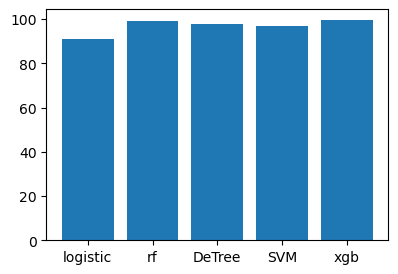

In [3]:
print ("comparaison valeur accuracy")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [91, 99.3, 98, 97, 99.5] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

comparaison temps d'execution


<BarContainer object of 5 artists>

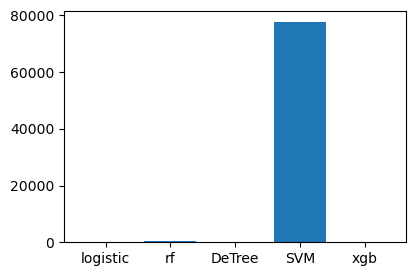

In [4]:
print ("comparaison temps d'execution")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [34.7, 334, 16.9, 77578.81, 34] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

# Reduction nombre colonnes

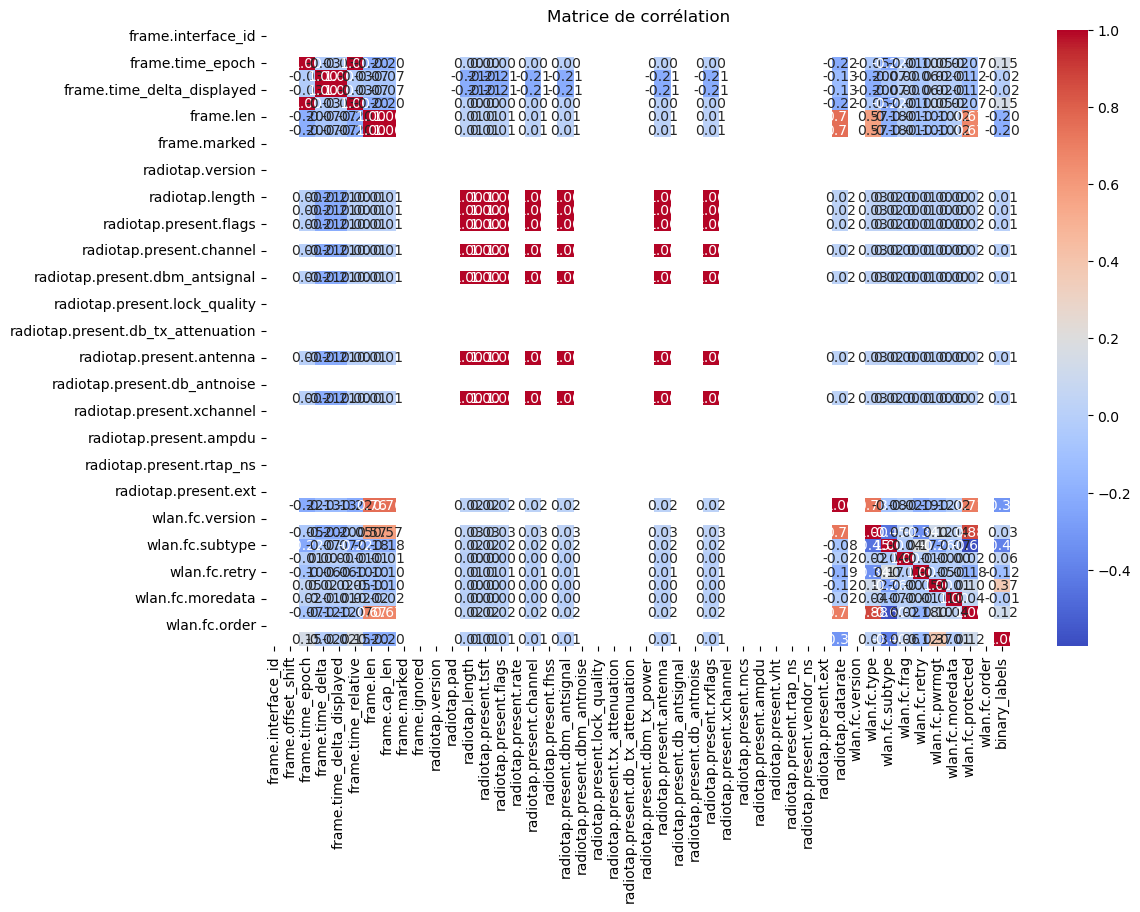

In [21]:
# Calculer la matrice de corrélation
correlation_matrix = train.corr()
# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [81]:
# Définir le seuil de corrélation
threshold = 0.0001

# Extraire les colonnes ayant une corrélation absolue supérieure au seuil avec la variable cible
target_correlation = correlation_matrix['binary_labels'].abs()
relevant_features = target_correlation[target_correlation > threshold]

# Sélectionner les colonnes pertinentes
relevant_columns = relevant_features.index.tolist()

# Calculer les colonnes à supprimer
columns_to_drop = [col for col in train.columns if col not in relevant_columns]

# Supprimer les colonnes non pertinentes
data_filtered = train.drop(columns=columns_to_drop)

# Afficher les colonnes sélectionnées
print("Colonnes sélectionnées :\n", relevant_columns)
print("\nColonnes supprimées :\n", columns_to_drop)

# Afficher les premières lignes du DataFrame filtré
print("\nDataFrame filtré :\n", data_filtered.head())

Colonnes sélectionnées :
 ['frame.time_epoch', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_relative', 'frame.len', 'frame.cap_len', 'radiotap.length', 'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.channel', 'radiotap.present.dbm_antsignal', 'radiotap.present.antenna', 'radiotap.present.rxflags', 'radiotap.datarate', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected', 'binary_labels']

Colonnes supprimées :
 ['frame.interface_id', 'frame.offset_shift', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.present.rate', 'radiotap.present.fhss', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.a

In [82]:
train.shape

(1795575, 46)

In [83]:
data_filtered.shape

(1795575, 22)

# XGBClassifier

In [70]:
#separation jeu d'entrainement et de test
X = data_filtered.drop(columns=['binary_labels'])
y = data_filtered['binary_labels'] 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
#MODELISATION
start = time.time()
start_time = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9957321046349084
[[488811   1409]
 [   890  47563]]
Temps d'exécution Détection de primitives : 16.80375838279724 secondes


# Logistic Regression

In [71]:
#MODELISATION
start = time.time()
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, logistic_predictions)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9100511813289324
[[490220      0]
 [ 48453      0]]
Temps d'exécution Détection de primitives : 18.2216694355011 secondes


# Random Forest

In [56]:
#MODELISATION
start = time.time()
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.981957514113386
[[489995    225]
 [  9494  38959]]
Temps d'exécution Détection de primitives : 192.9300618171692 secondes


# Decision Tree

In [84]:
#MODELISATION
start = time.time()
start_time = time.time()
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9818814011468925
[[487554   2666]
 [  7094  41359]]
Temps d'exécution Détection de primitives : 4.201147079467773 secondes


# SVM

In [85]:
#MODELISATION
start = time.time()
start_time = time.time()
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9100511813289324
[[490220      0]
 [ 48453      0]]
Temps d'exécution Détection de primitives : 37894.4830019474 secondes
